# Exploring the colorspaces of images for thresholding parameters.

In [1]:
%matplotlib inline
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
cv2.startWindowThread()

1

In [3]:
# Parameters
with os.scandir("../test_images/") as it:
    test_image_paths = [ entry.path for entry in it if entry.is_file() ]

In [4]:
# Load Camera Calibraion
with open("../camera_properties.pkl", 'rb') as fd:
    camera_calibration = pickle.load(fd)

In [5]:
mtx = camera_calibration["mtx"]
dist = camera_calibration["dist"]

In [6]:
def img_pipeline(img):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    return img

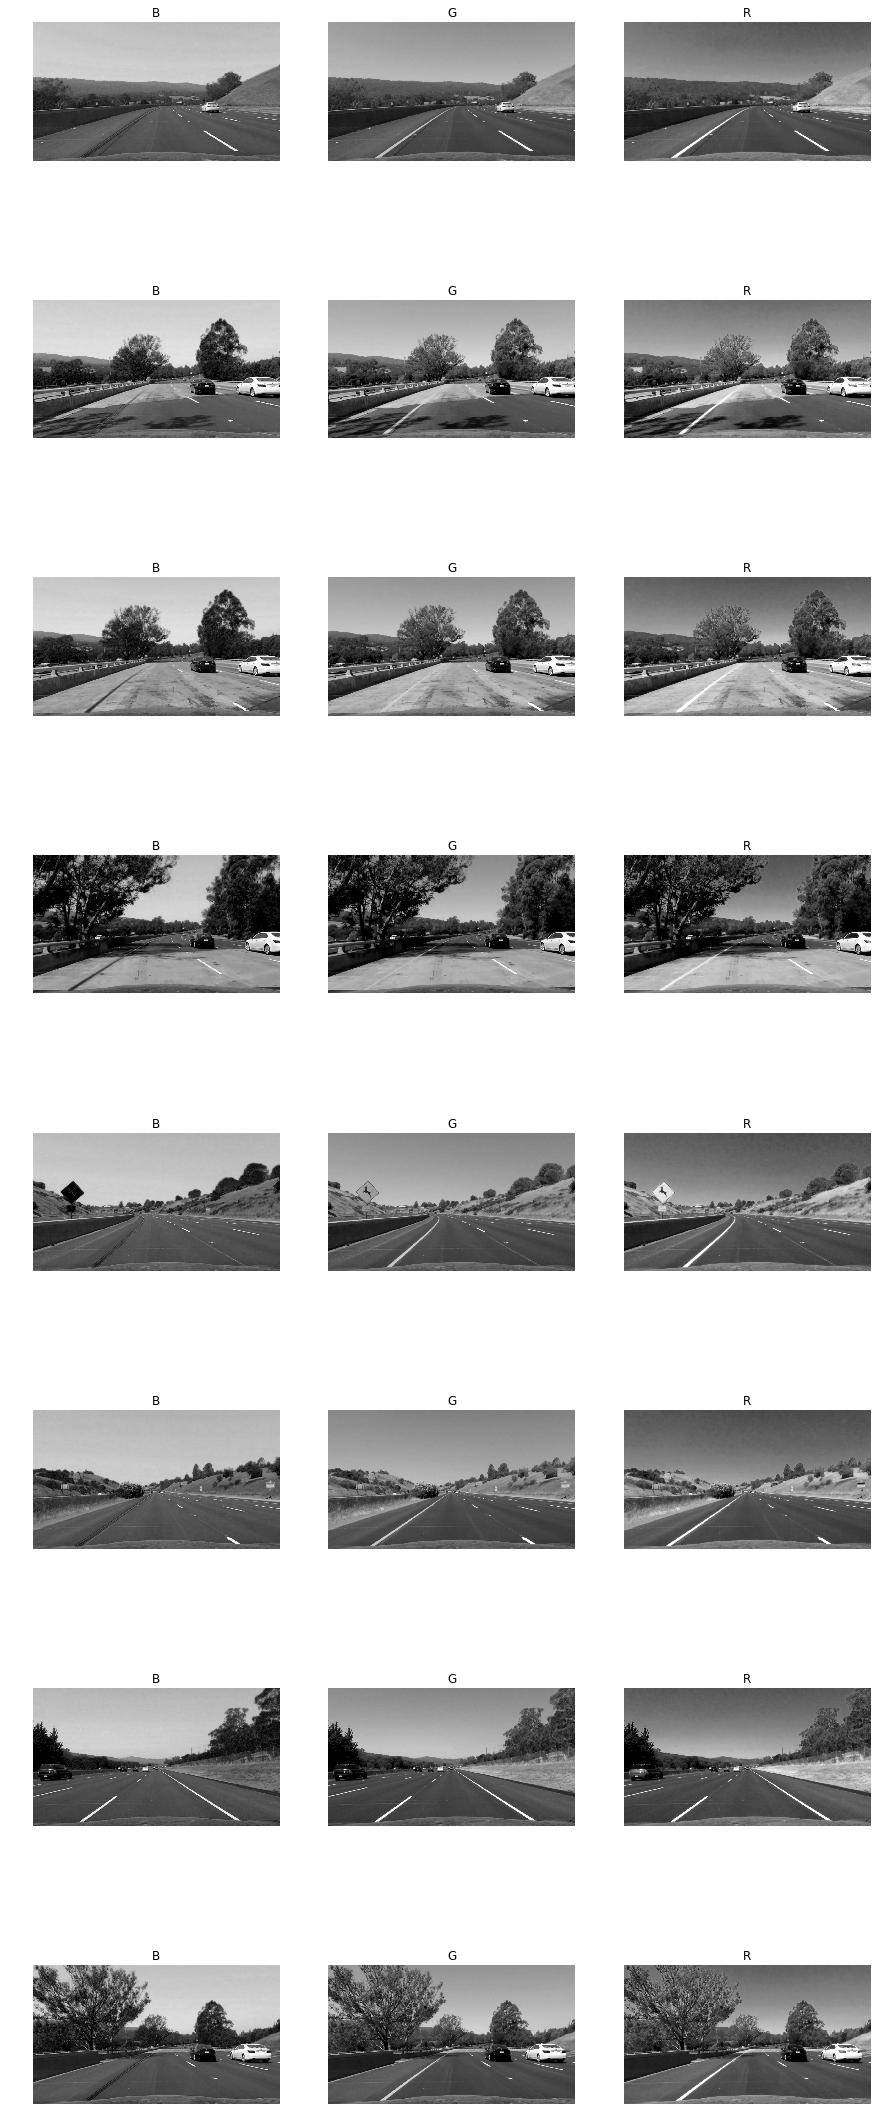

In [7]:
fig, axes = plt.subplots(8, 3, figsize=(15,40))
for i in range (8):
        img = cv2.imread(test_image_paths[i])
        img = img_pipeline(img)
        axes[i,0].set_title("B")
        axes[i,0].imshow(img[:,:,0], cmap="gray")
        axes[i,0].set_axis_off()
        axes[i,1].set_title("G",)
        axes[i,1].imshow(img[:,:,1], cmap="gray")
        axes[i,1].set_axis_off()
        axes[i,2].set_title("R")
        axes[i,2].imshow(img[:,:,2], cmap="gray")
        axes[i,2].set_axis_off()

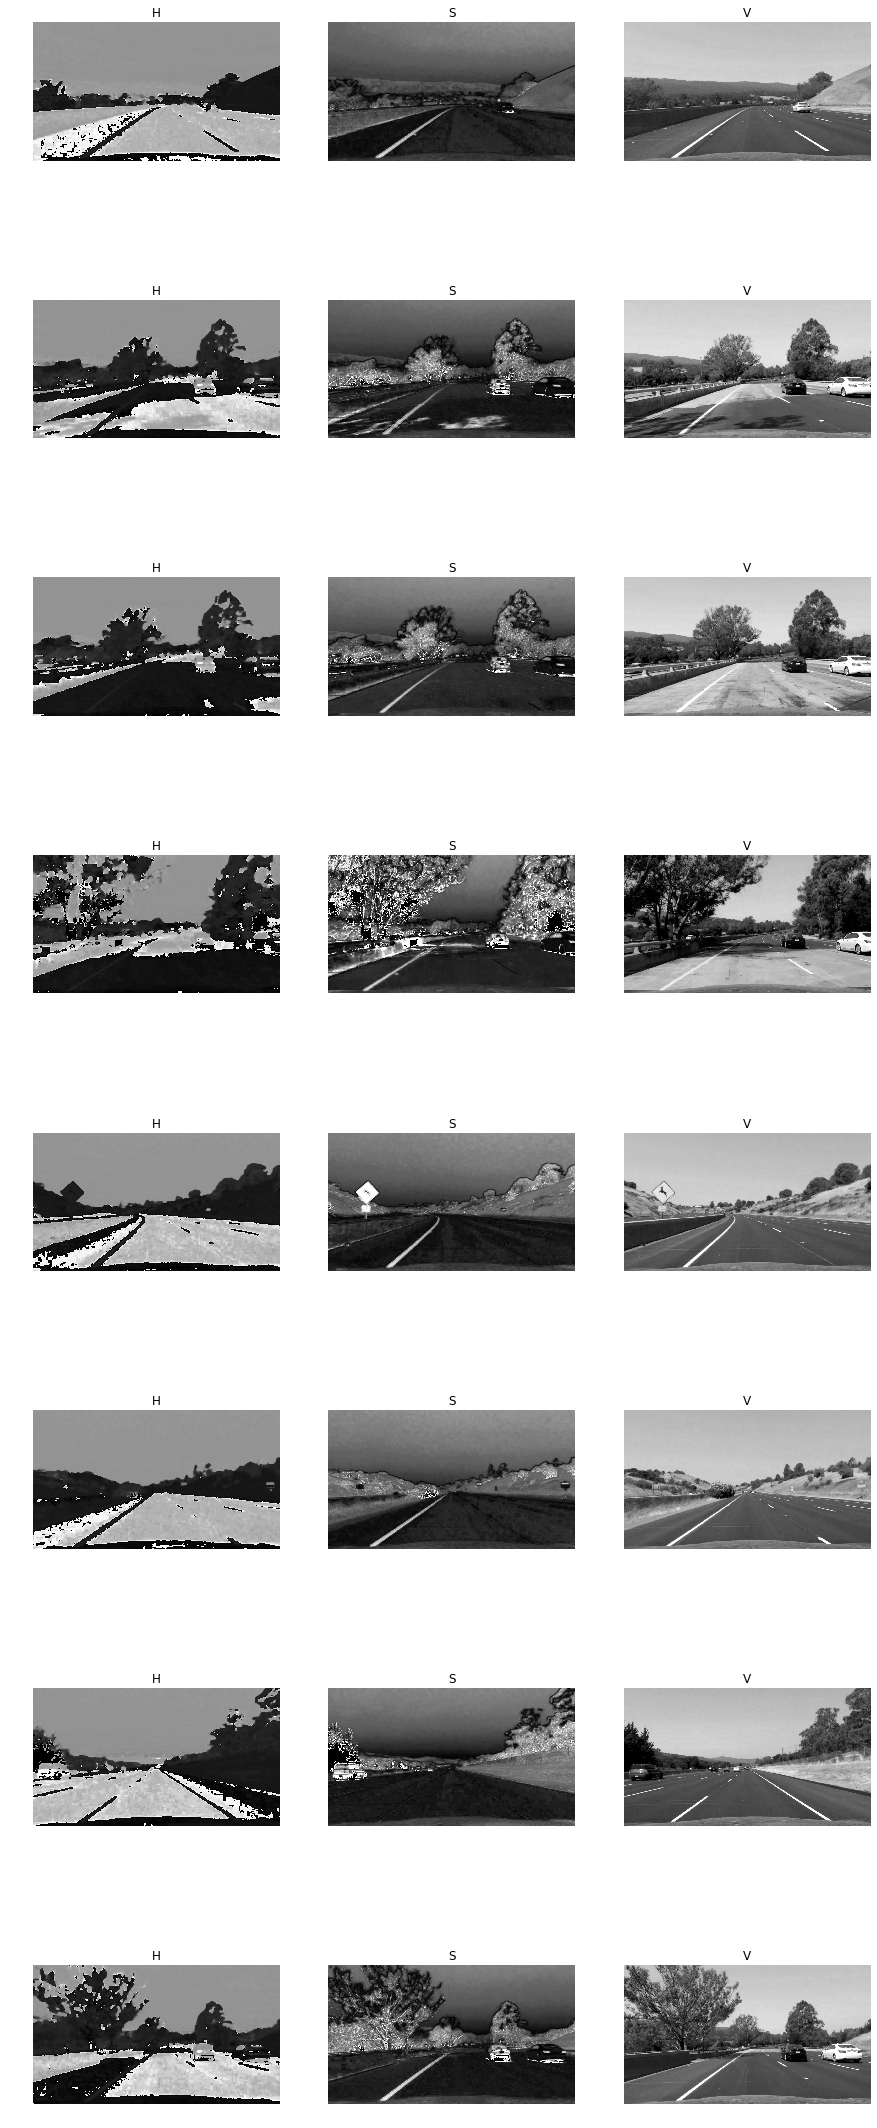

In [11]:
fig, axes = plt.subplots(8, 3, figsize=(15,40))
for i in range (8):
        img = cv2.imread(test_image_paths[i])
        img = img_pipeline(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        axes[i,0].set_title("H")
        axes[i,0].imshow(img[:,:,0], cmap="gray")
        axes[i,0].set_axis_off()
        axes[i,1].set_title("S",)
        axes[i,1].imshow(img[:,:,1], cmap="gray")
        axes[i,1].set_axis_off()
        axes[i,2].set_title("V")
        axes[i,2].imshow(img[:,:,2], cmap="gray")
        axes[i,2].set_axis_off()
        
plt.savefig("../output_images/HSV.png")

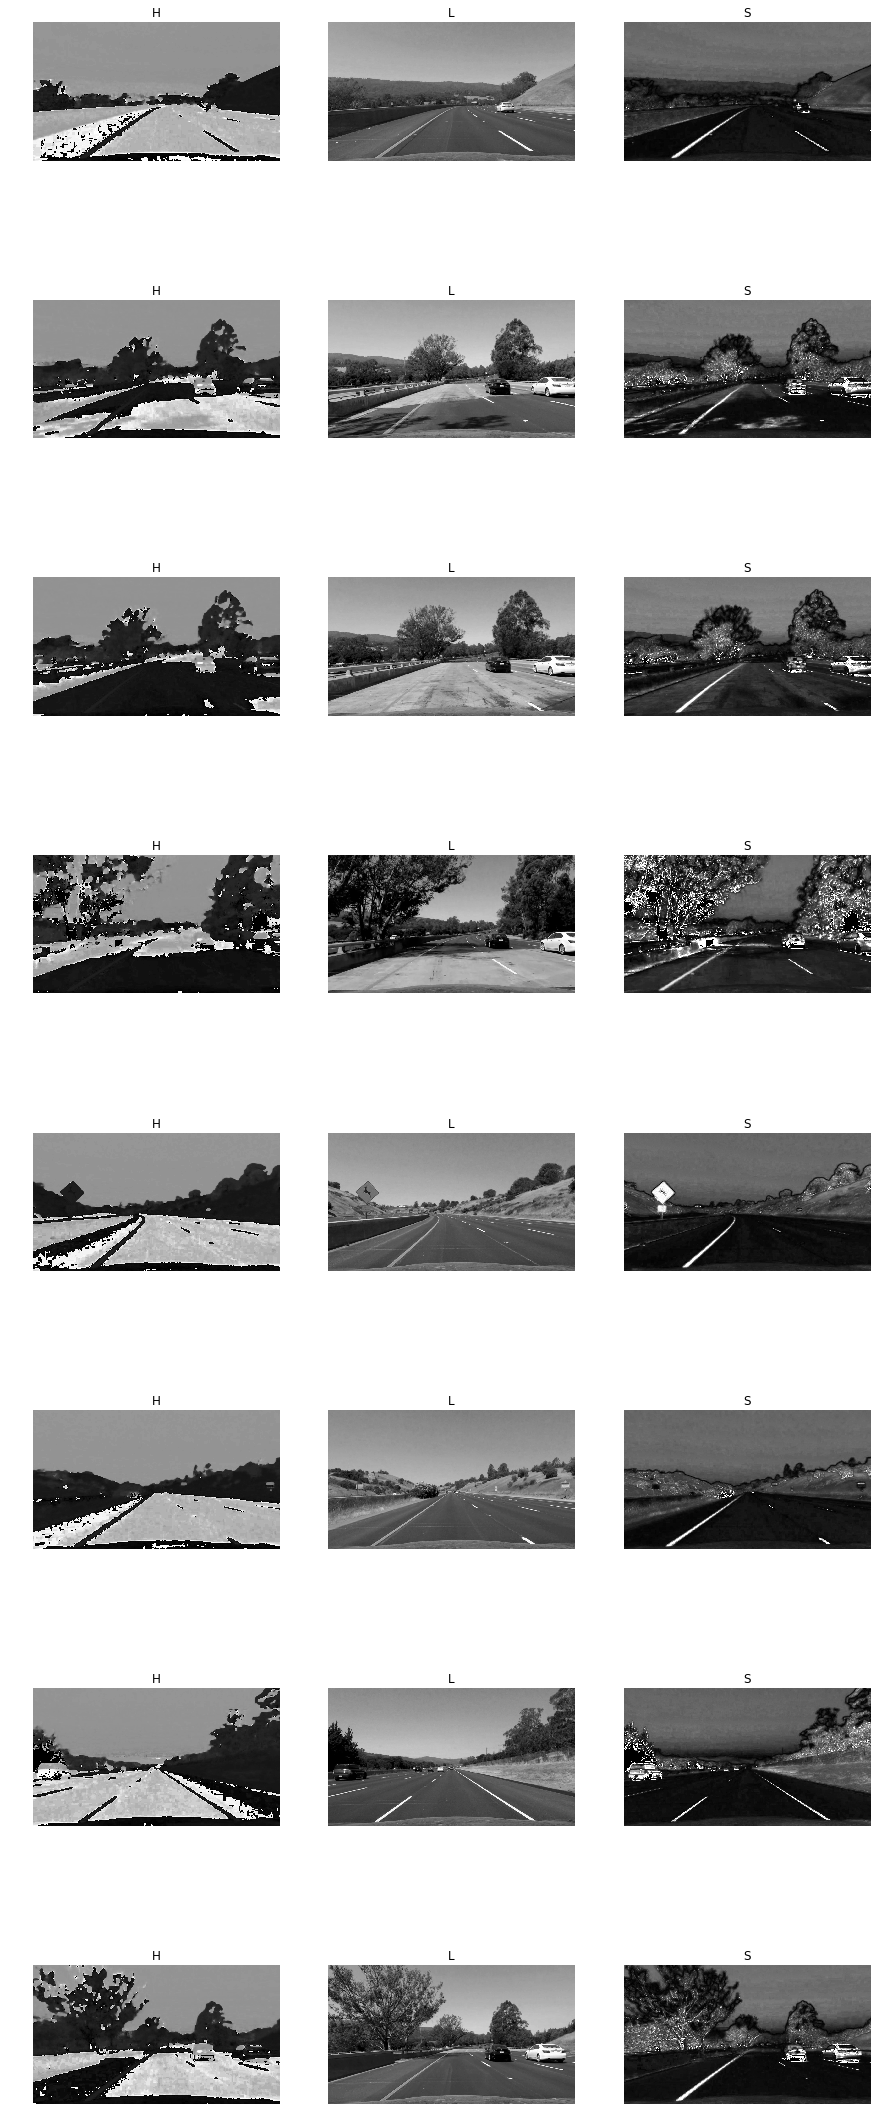

In [14]:
fig, axes = plt.subplots(8, 3, figsize=(15,40))
for i in range (8):
        img = cv2.imread(test_image_paths[i])
        img = img_pipeline(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        axes[i,0].set_title("H")
        axes[i,0].imshow(img[:,:,0], cmap="gray")
        axes[i,0].set_axis_off()
        axes[i,1].set_title("L",)
        axes[i,1].imshow(img[:,:,1], cmap="gray")
        axes[i,1].set_axis_off()
        axes[i,2].set_title("S")
        axes[i,2].imshow(img[:,:,2], cmap="gray")
        axes[i,2].set_axis_off()

In [9]:
def find_edges(image, ):
    # Remove noise by blurring with a Gaussian filter
    image = cv2.GaussianBlur(image, (5, 5), 0)
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    s = hls[:,:,2]
    #gray = (0.5*image[:,:,0] + 0.4*image[:,:,1] + 0.1*image[:,:,2]).astype(np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
    # _, gray_binary = cv2.threshold(gray.astype('uint8'), 130, 255, cv2.THRESH_BINARY)
    
    # switch to gray image for laplacian if 's' doesn't give enough details
    total_px = image.shape[0]*image.shape[1]
    laplacian = cv2.Laplacian(gray, cv2.CV_32F, ksize=5)
    cv2.convertScaleAbs(laplacian, laplacian)
    #mask_one = (laplacian < 0.15*np.min(laplacian)).astype(np.uint8)
    
    mask_one = (laplacian < 0.27*np.min(laplacian)).astype(np.uint8)
    
    #_, s_binary = cv2.threshold(s.astype('uint8'),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _, s_binary = cv2.threshold(s.astype('uint8'), 190, 255, cv2.THRESH_BINARY)
    mask_two = s_binary


    combined_binary = np.clip(cv2.bitwise_and(gray_binary,
                        cv2.bitwise_or(mask_one, mask_two)), 0, 1).astype('uint8')

    return combined_binary

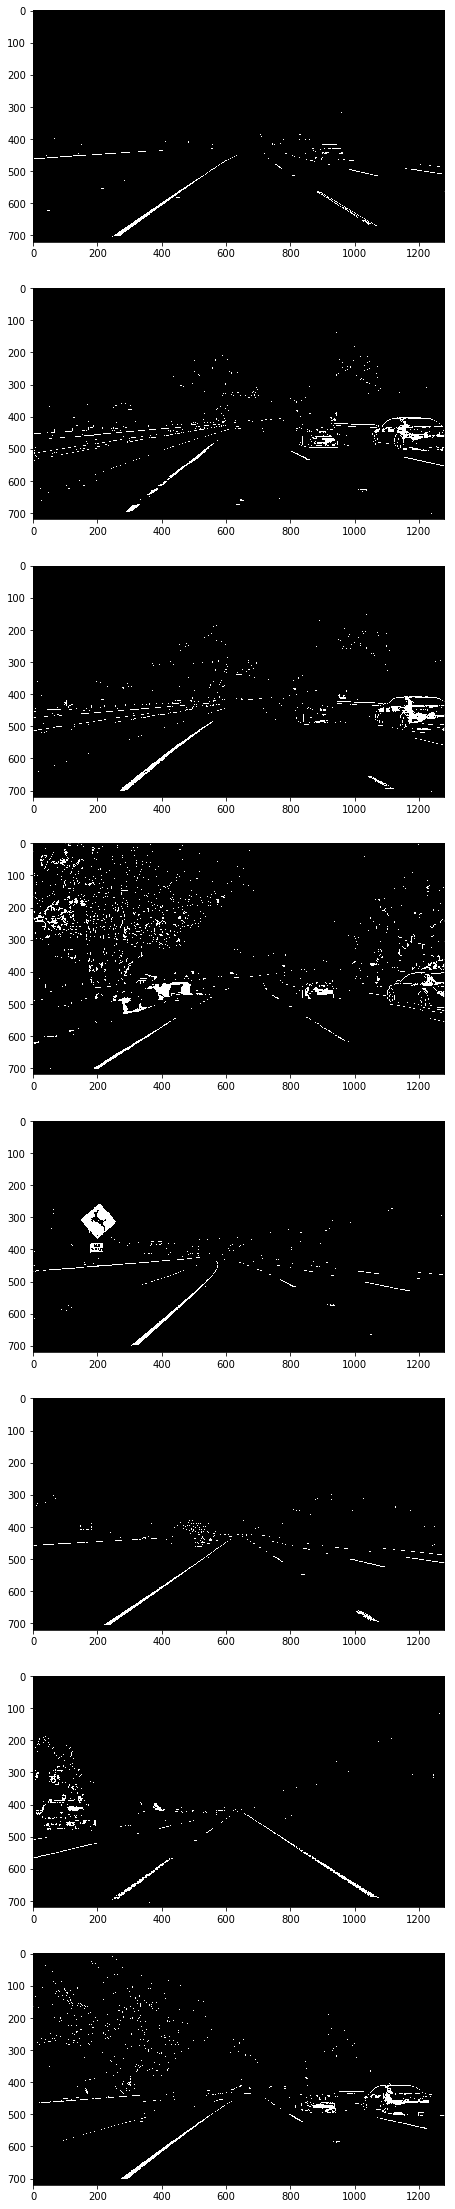

In [12]:
fig, axes = plt.subplots(8, 1, figsize=(15,40))
for i in range (8):
        img = cv2.imread(test_image_paths[i])
        img = img_pipeline(img)
        img = find_edges(img)
        axes[i].imshow(img, cmap='gray')
plt.savefig("../output_images/Laplacians.png")